# Cross Validation Explained

#### Cross-validation is a powerful technique in machine learning used to assess the performance of 
#### a model and ensure its generalization ability. It helps to overcome the limitations of a simple 
#### train-test split, where the model's performance can be highly dependent on the particular data 
#### points that end up in the training and testing sets.

#### The core idea behind cross-validation is to partition the dataset into multiple subsets (or "folds"). 
#### The model is then trained and evaluated multiple times, with each iteration using a different fold as 
#### the validation set and the remaining folds as the training set. This process provides a more robust and 
#### reliable estimate of how the model will perform on unseen data.

### Let's break down the concept with examples using Python and scikit-learn.

## Why Cross-Validation?
#### Imagine you have a dataset of 100 samples. If you split it 80/20 into training and testing, your test set 
#### only has 20 samples. If these 20 samples are not representative of the overall data, your model's performance 
#### on this specific test set might be misleading. Cross-validation addresses this by:

#### * Reducing Variance: By training and testing on different subsets of the data, it reduces the variability of the 
####   performance estimate.

#### * Better Generalization Estimate: It provides a more accurate picture of how well the model will generalize to new, 
####   unseen data.

#### * More Efficient Use of Data: All data points eventually get to be part of the training and validation sets, making 
####   better use of limited data.

## Common Types of Cross-Validation
#### 1. K-Fold Cross-Validation: Splits the data into k equal-sized folds. The model is trained on k-1 folds and tested 
#### on the remaining fold, repeating k times so each fold is used as the test set once.
#### 2. Stratified K-Fold Cross-Validation: Similar to k-fold, but ensures the class distribution in each fold is 
#### representative of the overall dataset, useful for imbalanced datasets.
#### 3. Leave-One-Out Cross-Validation (LOOCV): Uses one sample as the test set and the rest for training, repeating 
#### for each sample. Computationally expensive for large datasets.

## Types of Cross-Validation
#### 1. Holdout Method (Train-Test Split)
#### The simplest form, where data is split once into training and testing sets.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

Accuracy: 1.00


## 2. K-Fold Cross-Validation 
#### Splits the data into k equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold, 
#### repeating k times so each fold is used as the test set once.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize model
model = LogisticRegression(max_iter=200)

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Output results
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Accuracy scores for each fold: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean accuracy: 0.9733333333333334
Standard deviation: 0.024944382578492935


### Explanation:
#### * The Iris dataset is loaded with features (X) and labels (y).
#### * KFold(n_splits=5) splits the data into 5 folds, with shuffle=True to randomize the data.
#### * cross_val_score trains and tests the logistic regression model 5 times, each time using a different fold as the test set.
#### * The output shows the accuracy for each fold, the mean accuracy, and the standard deviation to assess consistency.

## 3. Stratified K-Fold Cross-Validation: 
#### Similar to k-fold, but ensures the class distribution in each fold is representative of the overall dataset, 
#### useful for imbalanced datasets.

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Generate imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_samples=1000, random_state=42)

# Initialize model
model = RandomForestClassifier(random_state=42)

# Set up stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=skf, scoring='f1_weighted')

# Output results
print("F1 scores for each fold:", scores)
print("Mean F1 score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

F1 scores for each fold: [0.98977778 0.97525568 0.95451389 0.97472994 0.99019918]
Mean F1 score: 0.9768952957571704
Standard deviation: 0.013048034382353866


### Explanation:
#### * make_classification creates a dataset with a 10:90 class imbalance.
#### * StratifiedKFold ensures each fold maintains the 10:90 class ratio.
#### * We use scoring='f1_weighted' to evaluate performance, suitable for imbalanced data.
#### * The output shows the F1 score for each fold, mean, and standard deviation.

## 4. Leave-One-Out Cross-Validation (LOOCV)
#### LOOCV uses each sample as a test set once. It’s computationally intensive but useful for small datasets.

In [7]:
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC

# X, y = iris.data[:100], iris.target[:100] # This will include class 0 and 1
X, y = iris.data, iris.target # Use all data, recommended for full cross-validation

# Initialize model
model = SVC(kernel='linear')

# Set up LOOCV
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')

# Output results
print("Number of folds:", len(scores))
print("Mean accuracy:", np.mean(scores))

Number of folds: 150
Mean accuracy: 0.98


### Explanation:
#### * We use all the data sample.
#### * LeaveOneOut creates 150 folds, each with one test sample and 149 training samples.
#### * The mean accuracy is computed across all 150 iterations.

## 5. Time Series Cross-Validation
#### For time-dependent data where order matters.

In [11]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Sample data
data = np.array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])

# TSCV with 3 splits, test size = 2
tscv = TimeSeriesSplit(n_splits=3, test_size=2)
for train_idx, test_idx in tscv.split(data):
    train, test = data[train_idx], data[test_idx]
    print(f"Train: {train}, Test: {test}")

Train: [100 110 120 130], Test: [140 150]
Train: [100 110 120 130 140 150], Test: [160 170]
Train: [100 110 120 130 140 150 160 170], Test: [180 190]


Time Series Data (first 10 samples):
   Time      Value
0     0   2.483571
1     1   2.898848
2     2  10.116295
3     3  17.205319
4     4  10.339798
5     5  11.329315
6     6  20.406629
7     7  15.427344
8     8   7.530481
9     9  10.302970

Performing Time Series Cross-Validation with 5 splits:

--- Fold 1 ---
  Train set starts at index 0 (Value: 2.48)
  Train set ends at index 49 (Value: 18.77)
  Test set starts at index 50 (Value: 26.62)
  Test set ends at index 59 (Value: 31.29)
  Train set size: 50 samples
  Test set size: 10 samples
  Mean Squared Error for Fold 1: 34.65

--- Fold 2 ---
  Train set starts at index 0 (Value: 2.48)
  Train set ends at index 59 (Value: 31.29)
  Test set starts at index 60 (Value: 27.60)
  Test set ends at index 69 (Value: 34.36)
  Train set size: 60 samples
  Test set size: 10 samples
  Mean Squared Error for Fold 2: 159.42

--- Fold 3 ---
  Train set starts at index 0 (Value: 2.48)
  Train set ends at index 69 (Value: 34.36)
  Test set starts

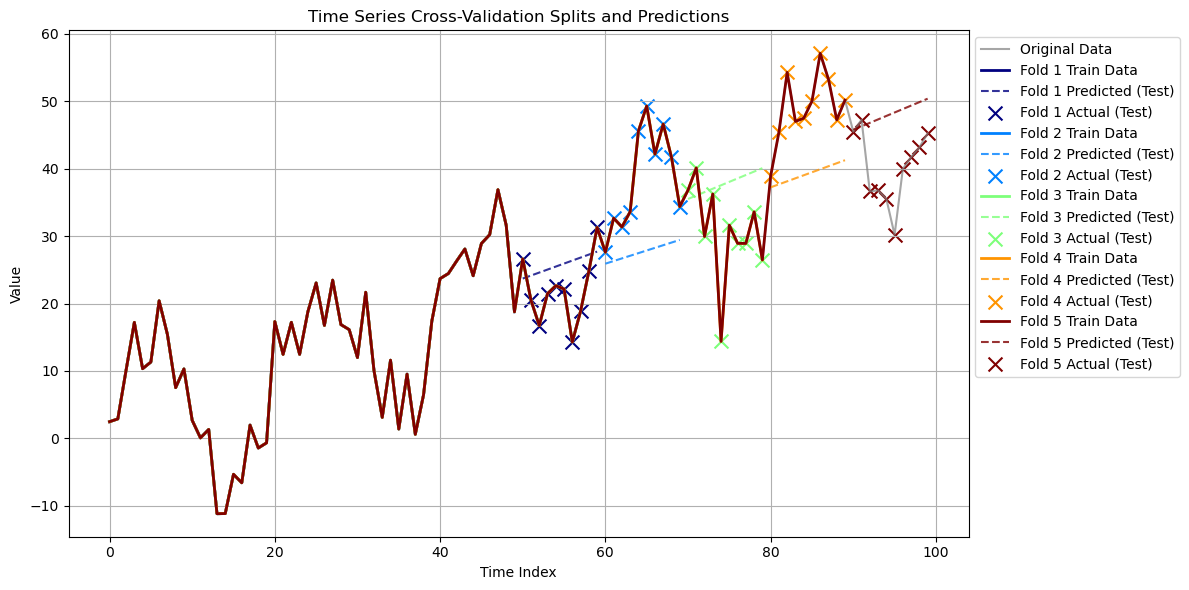

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Create a Synthetic Time Series Dataset
# Let's simulate some data with a trend and seasonality
np.random.seed(42)
n_samples = 100
time = np.arange(n_samples)
true_trend = 0.5 * time
true_seasonality = 10 * np.sin(time / 10 * np.pi)
noise = np.random.normal(0, 5, n_samples)
y = true_trend + true_seasonality + noise

# For simplicity, let's just use 'time' as our feature for now
X = time.reshape(-1, 1)

print("Time Series Data (first 10 samples):")
print(pd.DataFrame({'Time': time, 'Value': y}).head(10))

# 2. Initialize the Model
model = LinearRegression()

# 3. Define TimeSeriesSplit Cross-Validation
# n_splits: The number of splitting iterations in the cross-validator.
#           This determines how many train/test pairs will be generated.
#           If n_splits=5, you'll have 5 folds.
# test_size: Optional. The size of the test set in each split.
#            If not specified, the test size grows with the training set.
#            We'll set it to a fixed size for clearer walk-forward validation.
tscv = TimeSeriesSplit(n_splits=5, test_size=10) # 5 folds, each test set has 10 data points

# 4. Perform Time Series Cross-Validation
mse_scores = []
fold_info = []

print(f"\nPerforming Time Series Cross-Validation with {tscv.n_splits} splits:")

# Visualizing the splits
plt.figure(figsize=(12, 6))
plt.plot(time, y, label='Original Data', color='gray', alpha=0.7)
colors = plt.cm.jet(np.linspace(0, 1, tscv.n_splits)) # Get a range of colors

for i, (train_index, test_index) in enumerate(tscv.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Print split information
    print(f"\n--- Fold {i+1} ---")
    print(f"  Train set starts at index {train_index[0]} (Value: {y[train_index[0]]:.2f})")
    print(f"  Train set ends at index {train_index[-1]} (Value: {y[train_index[-1]]:.2f})")
    print(f"  Test set starts at index {test_index[0]} (Value: {y[test_index[0]]:.2f})")
    print(f"  Test set ends at index {test_index[-1]} (Value: {y[test_index[-1]]:.2f})")
    print(f"  Train set size: {len(train_index)} samples")
    print(f"  Test set size: {len(test_index)} samples")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"  Mean Squared Error for Fold {i+1}: {mse:.2f}")

    # Plotting the splits
    plt.plot(time[train_index], y[train_index], color=colors[i], label=f'Fold {i+1} Train Data', linewidth=2)
    plt.plot(time[test_index], y_pred, color=colors[i], linestyle='--', label=f'Fold {i+1} Predicted (Test)', alpha=0.8)
    plt.scatter(time[test_index], y[test_index], color=colors[i], marker='x', s=100, label=f'Fold {i+1} Actual (Test)')

# 5. Output Results
print(f"\nAverage Mean Squared Error across {tscv.n_splits} folds: {np.mean(mse_scores):.2f}")
print(f"Standard Deviation of MSE across folds: {np.std(mse_scores):.2f}")

plt.title('Time Series Cross-Validation Splits and Predictions')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.tight_layout()
plt.show()

## Cross-Validation for Hyperparameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris # Import the dataset
import numpy as np # Import numpy

# Load Iris data (X and y are already defined in the context if you're continuing)
iris = load_iris()
X = iris.data
y = iris.target # This 'y' is discrete (0, 1, 2)

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

# Create grid search with 5-fold CV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score: 0.98


#### Cross-validation is an essential tool in your machine learning toolkit that helps create more reliable models and performance estimates. 
#### The choice of method depends on your specific dataset and problem requirements.